# Project: Investigate a No-show appointments Dataset
## Udactiy Data Analyst Nanodegree Program - Project 3 / Investigate Dataset
##### Esra Arı
Data taken from : https://www.kaggle.com/joniarroba/noshowappointments



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#aim">Aim</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='aim'></a>
## Aim

Following the questions may be asked when conducting the analysis:

> * Determining what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> * Is age range associated with the show up rate?
> * Which gender is more likely to show up for their appointments?
> * Are patients under the Bolsa Família program more likely to show up?
> * Are hypertension, diabetes, alcoholism, handicap or receiving SMS related to the likelihood of patients showing up?
> * Predicting if a patient will show up for their scheduled appointment?

Before exploring the dataset, necessary modules are imported for the analysis. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> * Load in the data, 
> * Check for cleanliness,  
> * Trim and clean your dataset for analysis.

### General Properties

In this section we are going to upload and look up the table and basic statistic to gain some inside for further analysis.

In [142]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


At first glance, we see that there is not a very dirty data set. However, "No-show" coloumn name may be problem while doing analysis. Therefore, in data cleaning part, we may consider changing column names. It seems that dataset includes different types of features from timestamp to string. 

In [143]:
df.shape

(110527, 14)

Dataset includes approximately 111K rows and 14 colomns/features

In [144]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here is some summary statistic for numeric variables. While doing data cleaning we need to consider and fix following points.

> * We need to standardize variable names.
> * We need to chance mapping of some variable to analyze easily.
> * We should drop Identity variables which are PatientId, AppointmentID	  while doing analysis to increase working performance. 
> * Also, it can be seen that Age feature has "-1" mininum and "155" maximum values. We should extract those mistaken/outlier inputs doing data cleaning. 
> * Apart from that %10, %20, %7, %3, %2 and %32 of population have scholarship, hypertension, diabetes, alcoholism, handicap or receiving SMS and receiving SMS respectively. 
> * There is data error for handicap binary feature. It has 4 as maximum value.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Here is type and missing information of features.
> * There is no any missing values so we donot need to consider how we are going to treat those missing values.
> * There 5 object/string and 10 integer types of feature. 

### Data Cleaning 

In this section we are going to extract uncessary colomns to increase performance and clean/treat the type and name of features.

> * Firstly, let's rename columns because some variable name may cause problem while doing analysis such as no-show colomn name.

In [146]:
df = df.rename(columns={'PatientId':'patient_id',
                        'AppointmentID':'appointment_id',
                        'Gender': 'sex', 
                        'ScheduledDay': 'scheduled_day', 
                        'AppointmentDay': 'appointment_day', 
                        'Age': 'age', 
                        'Neighbourhood': 'neighbourhood', 
                        'Scholarship': 'scholarship', 
                        'Hipertension': 'hypertension', 
                        'Diabetes': 'diabetic', 
                        'Alcoholism': 'alcoholic', 
                        'Handcap': 'handicap', 
                        'No-show': 'no_show'})

In [147]:
df.head()

,patient_id,appointment_id,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetic,alcoholic,handicap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> * We extract ID information because they are identity features which are not necessary to analyze.

In [148]:
df.drop(['patient_id','appointment_id'], axis=1, inplace=True)
df.head()

,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetic,alcoholic,handicap,SMS_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> * We need to chance mapping of some variables to make easy to analyze like no_show, sex. 
> * Also, scheduled_day and appointment_day variables should be converted into datetime format.

In [149]:
df['no_show'] = df['no_show'].map({'No': 1, 'Yes': 0})
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['handicap'] = df['handicap'].apply(lambda x: 1 if x >= 1 else x)


df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], infer_datetime_format=True)
df['appointment_day'] = pd.to_datetime(df['appointment_day'], infer_datetime_format=True)

In [150]:
df.head()

,sex,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetic,alcoholic,handicap,SMS_received,no_show
0,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
sex                110527 non-null int64
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetic           110527 non-null int64
alcoholic          110527 non-null int64
handicap           110527 non-null int64
SMS_received       110527 non-null int64
no_show            110527 non-null int64
dtypes: datetime64[ns](2), int64(9), object(1)
memory usage: 10.1+ MB


In [152]:
df.describe()

,sex,age,scholarship,hypertension,diabetic,alcoholic,handicap,SMS_received,no_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.798067
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> * Let's drop who have the age less than 0 and greater than 100.

In [153]:
df.drop(df[df['age'] <= 0].index, inplace=True)
df.drop(df[df['age'] >100].index, inplace=True)

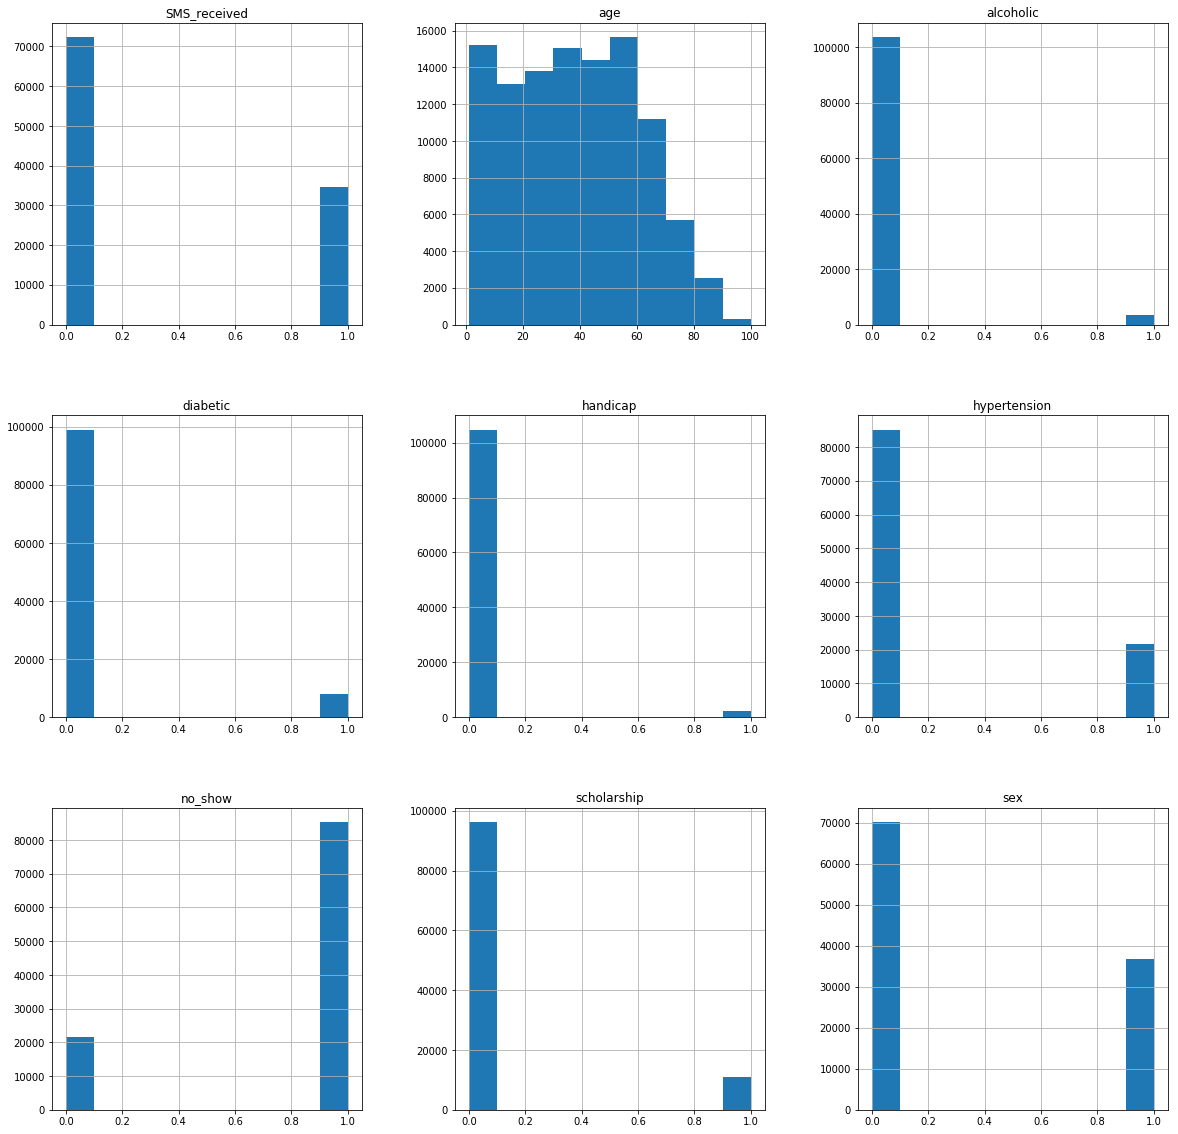

In [154]:
df.hist(figsize=(20, 20));

> When we look at graphs. There is no absurd/unexpected features. We can move on to answer research questions.


> We donot have to do any missig treatment. If there was any missing values, we could investigate the dataset especially on the variable is missing. (df[df.Age.isnull()].hist). After seing any difference with main datset then we coult replace those missing values with mean of Age. (df.fillna(df.mean(), inplace=True)). If the missing features not numeric, we could drop those rows.(df.dropna(inplace=True))

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 

> I would like to see that whether hypertension, diabetes, alcoholism, handicap or receiving SMS are related to the likelihood of patients showing up. Let's visualize and make command.

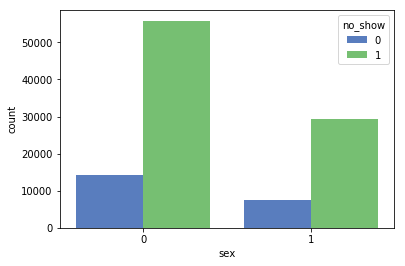

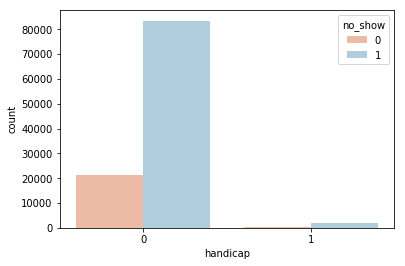

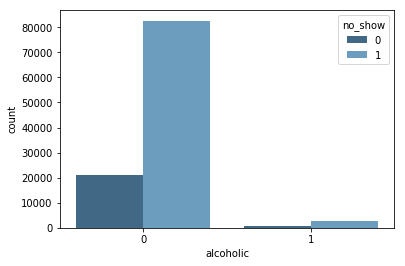

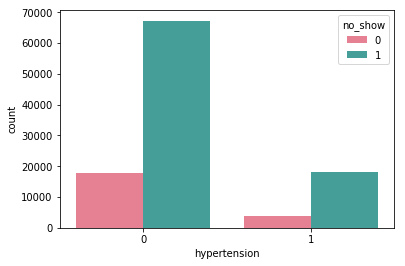

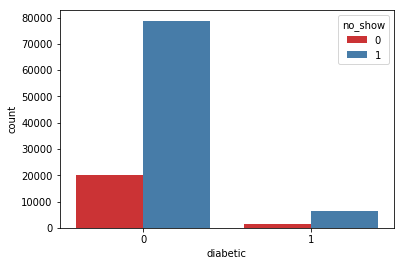

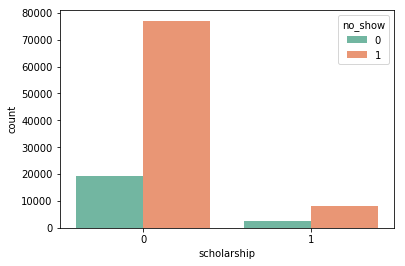

In [155]:
sns.countplot(x='sex', hue='no_show', data=df, palette='muted')
plt.show();
sns.countplot(x='handicap', hue='no_show', data=df, palette='RdBu')
plt.show();
sns.countplot(x='alcoholic', hue='no_show', data=df, palette='Blues_d')
plt.show();
sns.countplot(x='hypertension', hue='no_show', data=df, palette='husl')
plt.show();
sns.countplot(x='diabetic', hue='no_show', data=df, palette='Set1')
plt.show();
sns.countplot(x='scholarship', hue='no_show', data=df, palette='Set2')
plt.show();

> * From the gender graph, it can be seen that number of female patients are greater than male patients. Show up rate seems to similiar for both gender.
> * I couldnot figure out what means of handicap variable, therefore i will skip that one.
> * We can come up same conclusion for alholic, hypertension, diabetic and scholarship features. The absence of these variables constitutes the majority of the population. The existence of the variables does not give clear information about whether or not the patients will definitely come to their appointments from the graphs. We need to do further analyzes about that.

In [156]:
sex_counts = df.groupby(["sex", "no_show"]).count()["age"]
female_showed_up = sex_counts[0, 1]/df["sex"].value_counts()[0]
male_showed_up = sex_counts[1, 1]/df["sex"].value_counts()[1]

handicap_counts = df.groupby(["handicap", "no_show"]).count()["age"]
nonhandicap_showed_up = handicap_counts[0, 1]/df["handicap"].value_counts()[0]
handicap_showed_up = handicap_counts[1, 1]/df["handicap"].value_counts()[1]

alcoholic_counts = df.groupby(["alcoholic", "no_show"]).count()["age"]
nonalcoholic_showed_up = alcoholic_counts[0, 1]/df["alcoholic"].value_counts()[0]
alcoholic_showed_up = alcoholic_counts[1, 1]/df["alcoholic"].value_counts()[1]

hypertension_counts = df.groupby(["hypertension", "no_show"]).count()["age"]
nonhypertension_showed_up = hypertension_counts[0, 1]/df["hypertension"].value_counts()[0]
hypertension_showed_up = hypertension_counts[1, 1]/df["hypertension"].value_counts()[1]

diabetic_counts = df.groupby(["diabetic", "no_show"]).count()["age"]
nondiabetic_showed_up = diabetic_counts[0, 1]/df["diabetic"].value_counts()[0]
diabetic_showed_up = diabetic_counts[1, 1]/df["diabetic"].value_counts()[1]

scholarship_counts = df.groupby(["scholarship", "no_show"]).count()["age"]
nonscholarship_showed_up = scholarship_counts[0, 1]/df["scholarship"].value_counts()[0]
scholarship_showed_up = scholarship_counts[1, 1]/df["scholarship"].value_counts()[1]


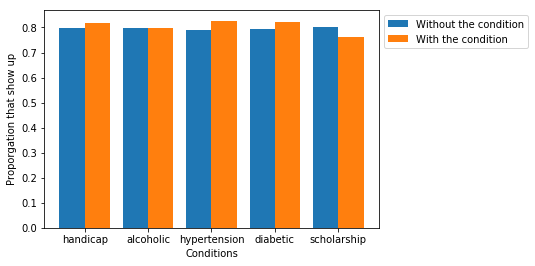

In [157]:
ind = np.array([1, 2, 3, 4, 5])
width = 0.4
plt.bar(ind, [nonhandicap_showed_up, nonalcoholic_showed_up, nonhypertension_showed_up,nondiabetic_showed_up, nonscholarship_showed_up], width = width, label = "Without the condition")
plt.bar(ind+width, [handicap_showed_up, alcoholic_showed_up, hypertension_showed_up, diabetic_showed_up, scholarship_showed_up ], width = width, label = "With the condition")
plt.xlabel("Conditions")
plt.ylabel("Proporgation that show up")
locations = ind+width/2
plt.xticks(locations, ["handicap", "alcoholic", "hypertension", "diabetic", "scholarship"])
plt.legend(bbox_to_anchor=(1,1));

> * From the graph, it can be easily understood that condition of handicap, hypertension and diabetic are related to the likelihood of patients non showing up.

> * Also, having scholarship implies that probability of showing up to the appointment is higher compare to nonscholarship patients.

### Research Question 2  

As a second question, let's look at how age ranges are associated with the show up rate.

In [158]:
print("Mean Age of patients showed-up appointment: {}". format(df.groupby(["no_show"]).mean()["age"][1]))
print("Mean Age of patients no showed-up appointment: {}". format(df.groupby(["no_show"]).mean()["age"][0]))

print("Total Number of patients showed-up appointment: {}". format(df.groupby(["no_show"]).count()["age"][1]))
print("Total Number of patients no showed-up appointment: {}". format(df.groupby(["no_show"]).count()["age"][0]))

Mean Age of patients showed-up appointment: 39.07193181951397
Mean Age of patients no showed-up appointment: 35.318125201826824
Total Number of patients showed-up appointment: 85303
Total Number of patients no showed-up appointment: 21677


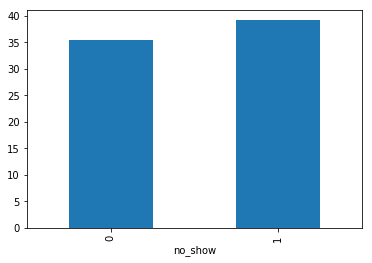

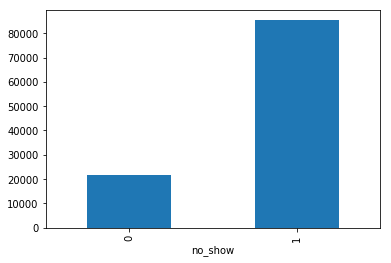

In [159]:
df.groupby("no_show").age.mean().plot(kind="bar")
plt.show();
df.groupby("no_show").age.count().plot(kind="bar")
plt.show();

> It can be seen that mean age of patients showed-up appointment is 4 year older than patients who didnt show-up their appointment. In the following, age distribution can be found.

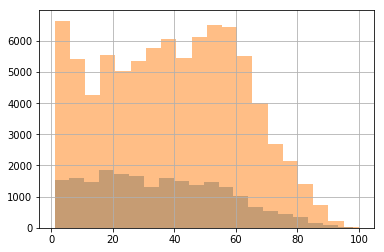

In [160]:
df.groupby("no_show").age.hist(alpha = 0.5, bins=20)
plt.legend();

In [161]:
df.groupby("no_show").age.describe()

,count,mean,std,min,25%,50%,75%,max
no_show,,,,,,,,
0,21677.0,35.318125,21.451648,1.0,18.0,33.0,52.0,98.0
1,85303.0,39.071932,22.645210,1.0,20.0,39.0,57.0,100.0


<a id='conclusions'></a>
## Conclusions

To sum up,
> * The vast majority of the population are patients who showed up to their appointments They have also higher mean age of compare to not showing up patients.
> * The patients who went to their appointments were stacked up to higher age groups
> * Having a scholarhip has a positive correlation on showing-up appointment while other conditions have reverse effect especially like being hypertension and diabetic.
